In [ ]:
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.models import Model
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, Input, concatenate, Activation, Lambda, BatchNormalization

import os
import cv2
import keras
import joblib
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle

from os import listdir
# from google.colab import files
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Подготовка данных**

In [ ]:
folder_path_train = '/content/gdrive/MyDrive/Colab Notebooks/ML/tpha'
folder_path_test = '/content/gdrive/MyDrive/Colab Notebooks/ML/test'

files_train = os.listdir(folder_path_train)
files_train = list(map(int, files_train))
files_train = sorted(files_train)

x_train_img = []
x_test_img = []

for i in range(len(files_train)):#по папкам (1,2...10)

    path_train = folder_path_train + "/" + str(files_train[i])
    path_test = folder_path_test + "/" + str(files_train[i])

    x_train = []
    x_test = []

    ################################################--->train data
    for image in os.listdir(path_train):

        img = cv2.imread(path_train + "/" + image)
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        np_img = np.array(img)
        x_train.append(np_img)

    x_train_img.append(x_train)

    ################################################--->test data
    for image1 in os.listdir(path_test):

        img1 = cv2.imread(path_test + "/" + image1)
        img1 = cv2.resize(img1, (224, 224))
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

        np_img1 = np.array(img1)
        x_test.append(np_img1)

    x_test_img.append(x_test)



#x_train_img = np.array(x_train_img)
#print(x_train_img.shape())
# x_train_img = x_train_img / 255
#print(x_train_img)

In [ ]:
import random

def to_grey(image):
    image = np.array(image)

    for i in range(len(image)):
        for j in range(len(image[i])):
            k_first = image[i][j][0]
            for k in range(len(image[i][j])):
                image[i][j][k] = k_first

    #converted_img /= 255
    return image

# def multiple_preprocessing_function(image):
#     arr = [None, 'to_grey']
#     random_number = random.randint(0, 1)

#     if random_number == 1:
#         image = to_grey(image)
#     return image

In [ ]:
datagen_ = ImageDataGenerator(brightness_range=(0.8, 1.2),
                               fill_mode='nearest')
datagen = ImageDataGenerator(preprocessing_function=to_grey,
                              fill_mode='nearest')
# datagen = ImageDataGenerator(
#     #rotation_range=10,  # Вращение на 10 градусов
#     width_shift_range=0.1,  # Сдвиг по горизонтали на 10% ширины
#     height_shift_range=0.1,  # Сдвиг по вертикали на 10% высоты
#     #shear_range=0.1,  # Искажение изображения по горизонтали
#     #brightness_range=(0.5, 1.5),
#     #channel_shift_range=0.6,
#     preprocessing_function=multiple_preprocessing_function,
#     #zoom_range=[1.1, 2],  # Увеличение или уменьшение масштаба на 20%
#     # horizontal_flip=True,  # Отражение изображения по горизонтали
#     fill_mode='nearest'  # Режим заполнения пикселей после преобразований
# )

In [ ]:
augmented_images = []
pictures_needed = 500

for i in range(len(x_train_img)):
    images_in_one_folder = x_train_img[i]#берем одну папку с изображениями
    num_of_imgs = len(x_train_img[i])
    print(num_of_imgs)

    while len(x_train_img[i]) < pictures_needed:
        random_num = random.randint(0, num_of_imgs - 1)#выбираем рандомное изображение
        img = images_in_one_folder[random_num]#выбираем рандомное изображение для аугментации
        img = img.reshape((1,) + img.shape)
        # print(img.shape)
        # augmented_images.append(img)

        rand_aug = random.randint(0, 1)
        if rand_aug == 0:
            for batch in datagen.flow(img, batch_size=1):  # Создаем поток аугментированных изображений
                # augmented_images.append(batch)
                batch = batch.squeeze()
                x_train_img[i].append(batch)
                break
                # if len(augmented_images) >= 1:
                #     break
        else:
            for batch in datagen_.flow(img, batch_size=1):  # Создаем поток аугментированных изображений
                # augmented_images.append(batch)
                batch = batch.squeeze()
                x_train_img[i].append(batch)
                break
                # if len(augmented_images) >= 1:
                #     break


        # break



395
175
74
115
90
104
93
84
105
88


In [ ]:
x_train_img = np.array(x_train_img)
x_test_img = np.array(x_test_img)
print(x_train_img.shape)
print(x_test_img.shape)
x_train_img = x_train_img / 255
x_test_img = x_test_img / 255
# print(x_train_img)

(10, 500, 224, 224, 3)
(10, 4, 224, 224, 3)


In [ ]:
y_train_img = []
y_test_img = []

for i in range(len(x_train_img)):
    y_train = []
    for j in range(len(x_train_img[i])):
        y_train.append(i)
    y_train_img.append(y_train)

for i in range(len(x_test_img)):
    y_test = []
    for j in range(len(x_test_img[i])):
        y_test.append(i)
    y_test_img.append(y_test)

y_train_img = np.array(y_train_img)
y_test_img = np.array(y_test_img)
print(y_train_img.shape)
print(y_test_img.shape)

# Соединяем все "куски" массива по первой оси
x_train_img = np.concatenate(x_train_img, axis=0)
y_train_img = np.concatenate(y_train_img, axis=0)

x_test_img = np.concatenate(x_test_img, axis=0)
y_test_img = np.concatenate(y_test_img, axis=0)
# print(x_train_img.shape)
# print(y_train_img.shape)


(10, 500)
(10, 4)


In [ ]:
y_train_img = to_categorical(y_train_img, num_classes=10)
y_test_img = to_categorical(y_test_img, num_classes=10)
print(y_train_img[4999])
print(y_train_img[39])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#shuffle
x_train_img, y_train_img = shuffle(x_train_img, y_train_img, random_state=42)
x_test_img, y_test_img = shuffle(x_test_img, y_test_img, random_state=12)

In [ ]:
print(x_train_img.shape)
print(y_train_img.shape)
print(x_test_img.shape)
print(y_test_img.shape)

(5000, 224, 224, 3)
(5000, 10)
(40, 224, 224, 3)
(40, 10)


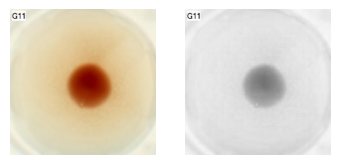

In [ ]:
# print(augmented_images[0])
for i in range(len(augmented_images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(augmented_images[i][0].astype('uint8'), cmap='gray')
    plt.axis('off')
plt.show()

**Модель**

In [ ]:
input_shape=(224, 224, 3)

inputs = tf.keras.Input(shape=input_shape)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',  kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)

x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,710,922 (98.08 MB)

 Trainable params: 25,710,922 (98.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
path = '{epoch:02d}.weights.h5'
model_checkpoint = ModelCheckpoint(filepath=path,
                                    monitor="val_loss",
                                    verbose=0,
                                    save_best_only=True,
                                    save_weights_only=True,
                                    )

In [ ]:
history = model.fit(x_train_img, y_train_img, batch_size=32, epochs=40, validation_split=0.2, callbacks=model_checkpoint)

Epoch 1/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 161ms/step - accuracy: 0.2768 - loss: 3.2350 - val_accuracy: 0.4570 - val_loss: 1.3980
Epoch 2/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 174ms/step - accuracy: 0.4950 - loss: 1.3273 - val_accuracy: 0.4660 - val_loss: 1.2676
Epoch 3/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 47s 227ms/step - accuracy: 0.6118 - loss: 1.0025 - val_accuracy: 0.7630 - val_loss: 0.6114
Epoch 4/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.7704 - loss: 0.6113 - val_accuracy: 0.7110 - val_loss: 0.7123
Epoch 5/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 225ms/step - accuracy: 0.7890 - loss: 0.5492 - val_accuracy: 0.7980 - val_loss: 0.5422
Epoch 6/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 280ms/step - accuracy: 0.8231 - loss: 0.4618 - val_accuracy: 0.8290 - val_loss: 0.4652
Epoch 7/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 43s 297ms/step - accuracy: 0.8469 - loss: 0.4057 - val_accuracy: 0.8400 - val_loss: 0.3981
Epoch 8/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 273ms/step - accuracy: 0.8774 - loss: 0.

In [ ]:
model.save('/content/gdrive/MyDrive/Colab Notebooks/ML/Model3(0.001).keras')

In [ ]:
model = load_model('/content/gdrive/MyDrive/Colab Notebooks/ML/Model2_cont.keras')

In [ ]:
# model.load_weights('/content/gdrive/MyDrive/Colab Notebooks/ML/Model3_37.weights.h5')
model.load_weights('/content/28.weights.h5')

In [ ]:
from tensorflow.keras import metrics

loss, accuracy = model.evaluate(x_test_img, y_test_img, verbose=0)
print('Точность на тестовых данных: {}'.format(accuracy))

Точность на тестовых данных: 0.925000011920929


In [ ]:
#тест по одиночке
pp = '/content/gdrive/MyDrive/Colab Notebooks/ML/test/10'

picture = 3
arr = []
for image in os.listdir(pp):
    arr.append(image)

img = cv2.imread(pp + "/" + arr[picture])
img = cv2.resize(img, (224, 224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

np_img = np.array(img)
np_img = np_img / 255
np_img = np_img.reshape((1,) + np_img.shape)

predictions = model.predict(np_img)
# predicted_classes = tf.argmax(predictions, axis=1)

# print("Предсказанные классы >> ", predicted_classes)
print(np.around(predictions, 3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
[[0.    0.    0.    0.    0.    0.    0.    0.    0.029 0.971]]


In [ ]:
predictions = model.predict(x_test_img)
print("Правильные ответы >> ", tf.argmax(y_test_img, axis=1))
# print(y_test_img)
# print(predictions)
predicted_classes = tf.argmax(predictions, axis=1)
print("Предсказанные классы >> ", predicted_classes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Правильные ответы >>  tf.Tensor(
[7 7 2 4 3 3 5 4 4 9 9 6 6 1 0 7 1 8 7 8 2 5 0 2 8 9 9 6 3 1 5 4 5 3 8 0 0
 1 6 2], shape=(40,), dtype=int64)
Предсказанные классы >>  tf.Tensor(
[7 7 2 4 3 2 5 4 4 9 9 6 6 1 0 7 0 8 7 8 2 5 0 2 8 9 9 6 3 1 5 4 5 3 7 0 0
 1 6 2], shape=(40,), dtype=int64)


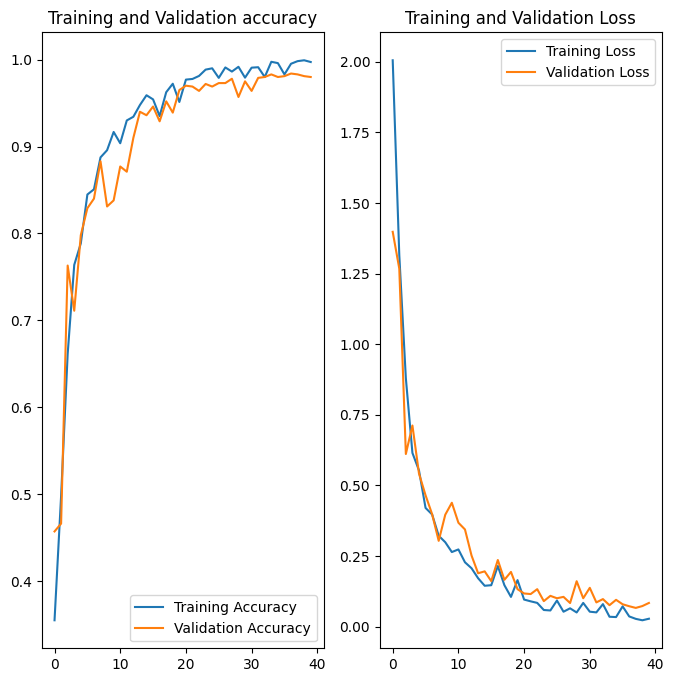

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("3_Training and Validation Accuracy and Loss.png", dpi=150)
plt.show()